<a href="https://www.kaggle.com/code/shubhamgupta012/regression-and-visualization-model-on-happy-score?scriptVersionId=134280252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/population-dataset/2015.csv


In [2]:
df = pd.read_csv('/kaggle/input/population-dataset/2015.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [7]:
df['Country'].value_counts()

Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: Country, Length: 158, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Family'>

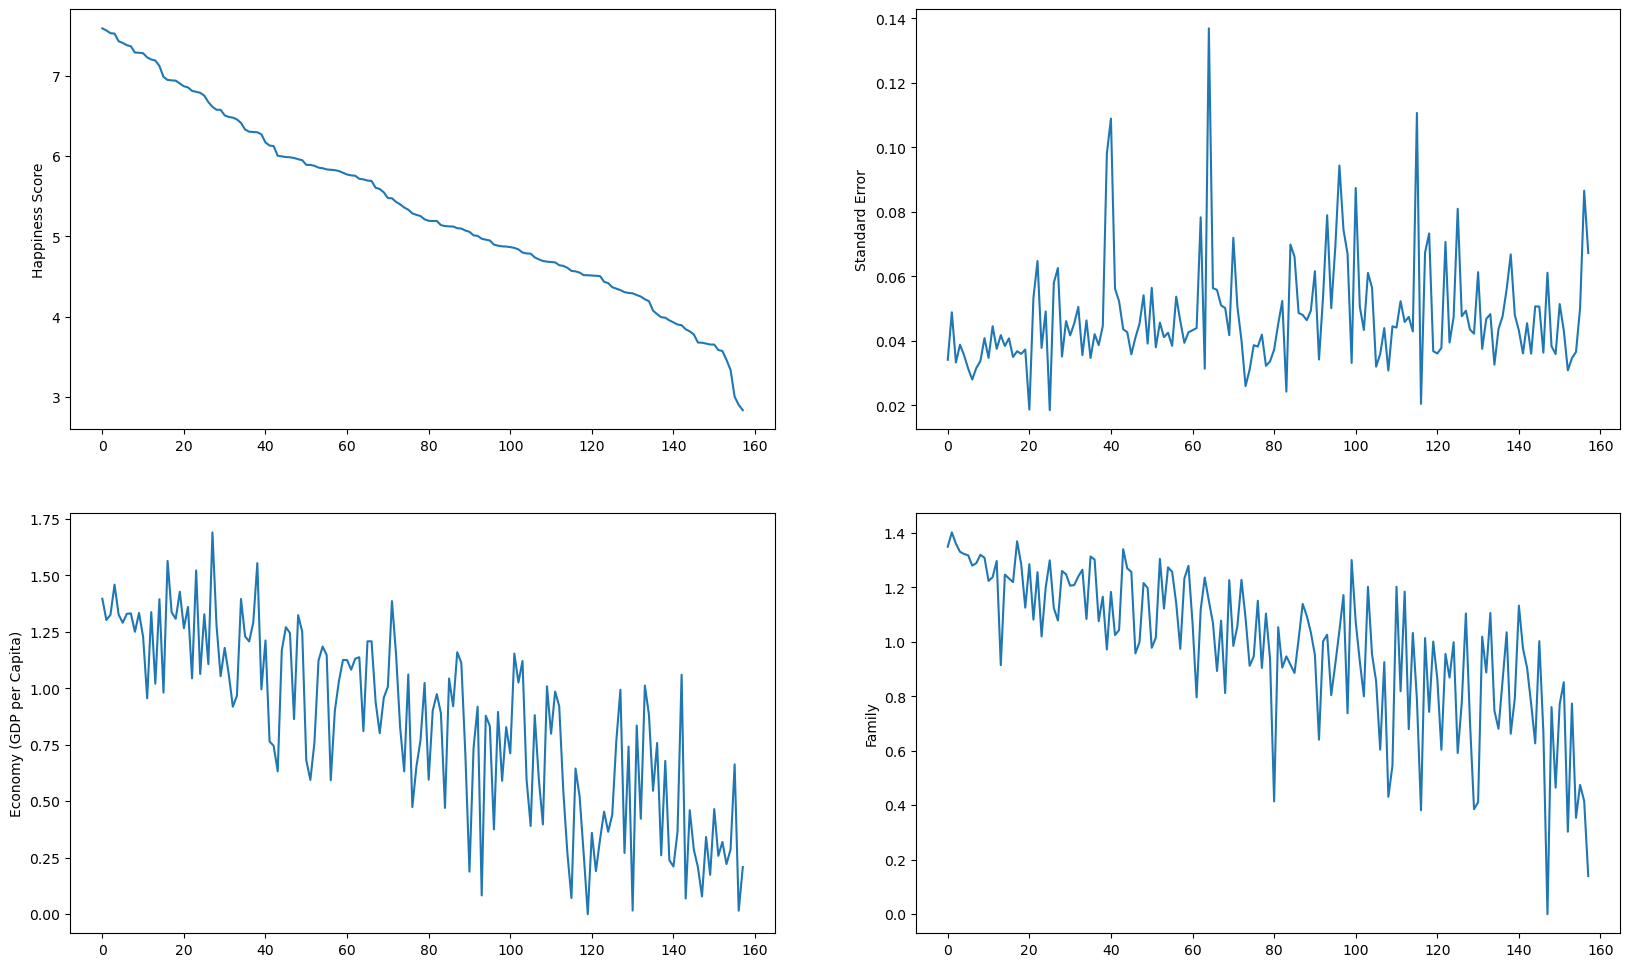

In [9]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(df['Happiness Score'])
plt.subplot(2,2,2)
sns.lineplot(df['Standard Error'])
plt.subplot(2,2,3)
sns.lineplot(df['Economy (GDP per Capita)'])
plt.subplot(2,2,4)
sns.lineplot(df['Family'])

<Axes: ylabel='Generosity'>

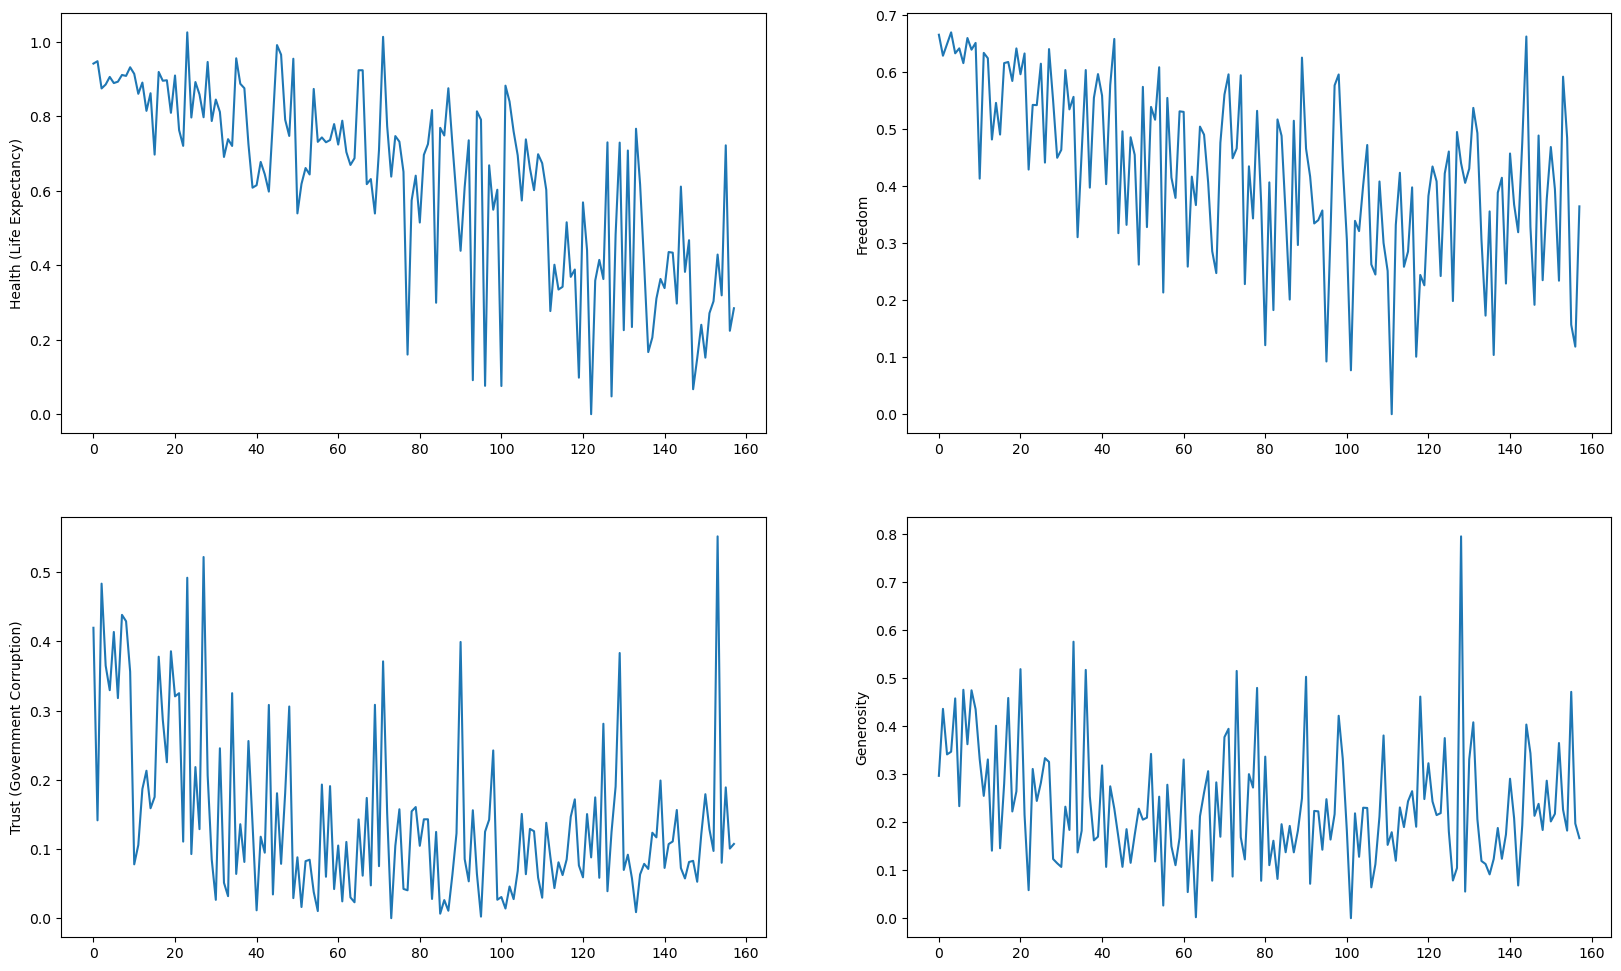

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.lineplot(df['Health (Life Expectancy)'])
plt.subplot(2,2,2)
sns.lineplot(df['Freedom'])
plt.subplot(2,2,3)
sns.lineplot(df['Trust (Government Corruption)'])
plt.subplot(2,2,4)
sns.lineplot(df['Generosity'])

<Axes: ylabel='Happiness Rank'>

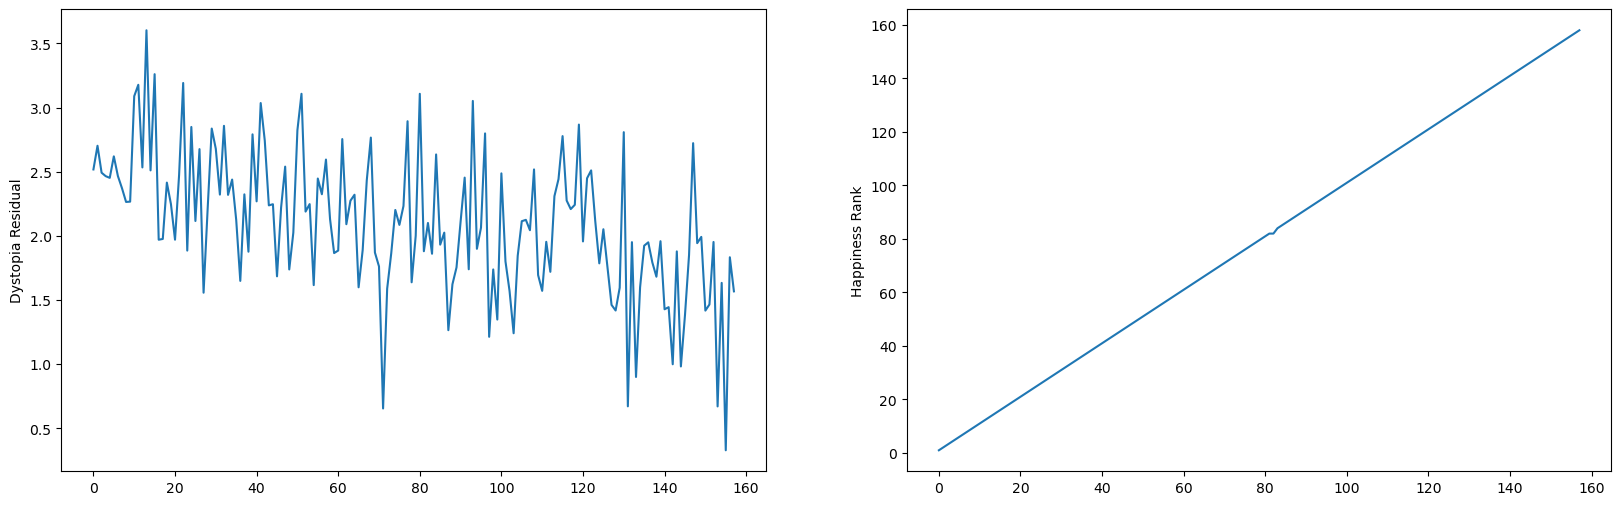

In [11]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.lineplot(df['Dystopia Residual'])
plt.subplot(1,2,2)
sns.lineplot(df['Happiness Rank'])

In [12]:
X = df.iloc[:,4:12]
X.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [13]:
Y = df.iloc[:,3]
Y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,Y_train.shape

((126, 8), (126,))

In [16]:
def accuracy(X_test,Y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)
    print("Mean squared Error  :",mse)
    print("Mean Absolute Error  :",mae)
    print("R2 Score  :",r2)

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [19]:
predictions = model.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

In [20]:
print("Mean squared Error  :",mse)
print("Mean Absolute Error  :",mae)
print("R2 Score  :",r2)

Mean squared Error  : 7.480577343262917e-08
Mean Absolute Error  : 0.00023115512532839722
R2 Score  : 0.9999999472734886


# Ridge Regression

In [21]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

In [22]:
print("Mean squared Error  :",mse)
print("Mean Absolute Error  :",mae)
print("R2 Score  :",r2)

Mean squared Error  : 0.0041391934872092384
Mean Absolute Error  : 0.049314958110532534
R2 Score  : 0.9970825081727799


# ElasticNet Regression

In [23]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, Y_train)


ElasticNet()

In [24]:
accuracy(X_test,Y_test)

Mean squared Error  : 1.4260115536344167
Mean Absolute Error  : 1.028967757936508
R2 Score  : -0.005117800389395466


# Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

In [26]:
accuracy(X_test,Y_test)

Mean squared Error  : 0.07849295536562523
Mean Absolute Error  : 0.22113093750000057
R2 Score  : 0.9446745950675612
